In [133]:
from pyincore import IncoreClient
from pyincore.analyses.capitalshocks import CapitalShocks

In [134]:
# Connect to IN-CORE service
client = IncoreClient()

### Capital shocks for Joplin 

In [135]:
# Joplin building inventory
building_inventory = "5dbc8478b9219c06dd242c0d"

# Joplin building to sector mapping table
building_to_sectors = "5f202d674620b643d787a5e7"

# Joplin building failure probability
failure_probability = "5f20347933b2700c110a3dd2"

In [136]:
# Create Capital shocks analysis
joplin_capital_shocks = CapitalShocks(client)

In [137]:
# Set analysis datasets
joplin_capital_shocks.load_remote_input_dataset("buildings", building_inventory)
joplin_capital_shocks.load_remote_input_dataset("buildings_to_sectors", building_to_sectors)
joplin_capital_shocks.load_remote_input_dataset("failure_probability", failure_probability)

# Set analysis parameter
joplin_capital_shocks.set_parameter("result_name", "my_sector_shocks") # name of csv file with results

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [138]:
# Run capital shocks analysis
joplin_capital_shocks.run_analysis()

True

In [139]:
# Retrieve result dataset
sector_shocks_result = joplin_capital_shocks.get_output_dataset("sector_shocks")

# Convert dataset to Pandas DataFrame
df = sector_shocks_result.get_dataframe_from_csv()
# Display top 5 rows of output data
df.head()

sector     shock
0    HS1  0.757463
1    HS2  0.758089
2  GOODS  0.816051
3  OTHER  0.822486
4  TRADE  0.834906

### CGE Model for Joplin

In [140]:
from pyincore.analyses.joplincgeanalysis import JoplinCGEModel

In [141]:
# SAM
# Social accounting matrix (SAM) contains data for firms, households and government which are organized 
# in a way to represent the interactions of all three entities in a typical economy
SAM = "5dd85ae7b9219c06d4da8de4"

# CAPITAL COMP
# BB is a matrix which describes how investment in physical infrastructure is transformed into functioning capital such as commercial and residential buildings. 
# These data are collected from the Bureau of Economic Analysis (BEA).
BB = "5dc1e620b9219c06dd2f473a"

# MISC TABLES
IOUT = "5dc1e6d8b9219c06dd2f475e"  # This is matrix that describes the transfer of tax revenue collected by the local government to help finance local government expenditures. 
MISC = "5dc1e736b9219c06dd2f4782"  # This is the name of a file that contains data for commercial sector employment and physical capital. It also contains data for the number of households and working households in the economy. 
MISCH = "5dc1e7b5b9219c06dd2f47a6"  # A file that contains elasticities for the supply of labor with respect to paying income taxes.
LANDCAP = "5dc1e810b9219c06dd2f47ca"  # Contains information regarding elasticity values for the response of changes in the price of physical capital with respect to the supply of investment.
EMPLOY = "5dc1e85ab9219c06dd2f47ee"  # Table name containing data for commercial sector employment.
IGTD = "5dc1e895b9219c06dd2f4812"  # This variable represents a matrix describing the transfer of taxes collected to a variable which permits governments to spend the tax revenue on workers and intermediate inputs.
TAUFF = "5dc1e8eeb9219c06dd2f4836"  # Represents social security tax rates
JOBCR = "5dc1e962b9219c06dd2f487e"  # This is a matrix describing the supply of workers coming from each household group in the economy. 
OUTCR = "5dc1e9aeb9219c06dd2f48bc"  # This a matrix describing the number of workers who live in Joplin but commute outside of town to work.
sector_shocks = "5f21d40d4620b643d78bb4c2"# This is the aggregation of building functionality states to capital shocks per sector.

In [142]:
# Create Joplin CGE Model
joplin_cge = JoplinCGEModel(client)

In [143]:
# Set analysis input datasets
joplin_cge.load_remote_input_dataset("SAM", SAM)
joplin_cge.load_remote_input_dataset("BB", BB)
joplin_cge.load_remote_input_dataset("IOUT", IOUT)
joplin_cge.load_remote_input_dataset("MISC", MISC)
joplin_cge.load_remote_input_dataset("MISCH", MISCH)
joplin_cge.load_remote_input_dataset("LANDCAP", LANDCAP)
joplin_cge.load_remote_input_dataset("EMPLOY", EMPLOY)
joplin_cge.load_remote_input_dataset("IGTD", IGTD)
joplin_cge.load_remote_input_dataset("TAUFF", TAUFF)
joplin_cge.load_remote_input_dataset("JOBCR", JOBCR)
joplin_cge.load_remote_input_dataset("OUTCR", OUTCR)
# joplin_cge.load_remote_input_dataset("sector_shocks", sector_shocks)

# Set analysis input dataset from previous Capital stock shock analysis
joplin_cge.set_input_dataset("sector_shocks", sector_shocks_result)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset 

True

The solver_path variable points to the absolute path for where the ipopt solver is installed. To know the absolute path of the ipopt solver in your local machine, open a terminal window, activate your pyIncore environment, and run the following command according to your OS:

- on Mac: open a terminal window, activate your conda environment and type `which ipopt`.
- on Windows: open a command terminal, activate your conda environment and type `whereipopt`.

Paste the resulting path below.

In [144]:
# Set analysis parameters
joplin_cge.set_parameter("solver_path", "/Users/mo/opt/miniconda3/envs/pyincore_wheel_app/bin/ipopt")
joplin_cge.set_parameter("model_iterations", 1)

True

In [145]:
# Run Joplin CGE model analysis
joplin_cge.run_analysis()

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Too few degrees of freedom (n_x = 490, n_c = 528).
  Trying fixed_variable_treatment = RELAX_BOUNDS

Number of nonzeros in equality constraint Jacobian...:     2890
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     3366

Total number of variables............................:      687
                     variables with only lower bounds:        0
                variables with l

Objective...............:  -1.6476310828901917e+03   -1.6476310828901917e+03
Dual infeasibility......:   3.7545224981619884e-12    3.7545224981619884e-12
Constraint violation....:   3.2741809263825417e-11    3.2741809263825417e-11
Complementarity.........:   4.9757853404843959e-09    4.9757853404843959e-09
Overall NLP error.......:   4.9757853404843959e-09    4.9757853404843959e-09


Number of objective function evaluations             = 14
Number of objective gradient evaluations             = 13
Number of equality constraint evaluations            = 14
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 13
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 12
Total CPU secs in IPOPT (w/o function evaluations)   =      0.035
Total CPU secs in NLP function evaluations           =      0.003

EXIT: Optimal Solution Found.
Ipopt 3.13.2: warm_start_init_point=yes
warm_s

True

### Show and plot the data

In [146]:
# Retrieve result datasets

# note swapped files, hact to make Joplin testbed code work
domestic_supply_result = joplin_cge.get_output_dataset("domestic-supply")
employment_result = joplin_cge.get_output_dataset("household-income")
household_income_result = joplin_cge.get_output_dataset("employment")

dsr = domestic_supply_result.get_dataframe_from_csv()
dsr.head()

DS0         DSl        ΔDS
0  477.825798  448.099237 -29.726560
1  229.635833  185.141721 -44.494112
2  266.694849  213.548996 -53.145853
3  682.739268  650.173513 -32.565755
4   22.018288   14.023057  -7.995230

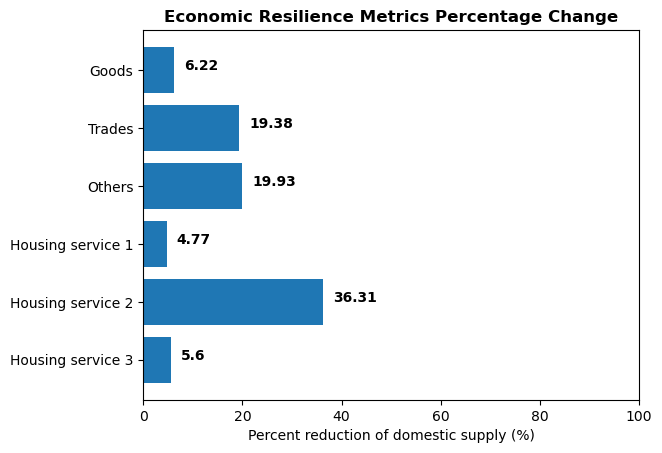

In [147]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

plt.rcdefaults()
fig, ax = plt.subplots()

sectors = ('Goods', 'Trades', 'Others', 'Housing service 1', 'Housing service 2','Housing service 3')
y_pos = np.arange(len(sectors))
performance = (1 - dsr['DSl']/dsr['DS0']) * 100  # percentage

for i, v in enumerate(round(performance,2)):
    ax.text(v + 2, i, str(v), color='black', fontweight='bold')
    
ax.barh(y_pos, performance, align='center', height=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(sectors)
ax.invert_yaxis()
ax.set_xlabel('Percent reduction of domestic supply (%)')
ax.set_title('Economic Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 100)
plt.show()

In [148]:
emr = employment_result.get_dataframe_from_csv()
emr.head()

HW0          HWl         ΔHW
0  2363  2129.623755 -233.376245
1  6965  6578.177693 -386.822307
2   753   711.234596  -41.765404
3  1238  1232.485478   -5.514522
4  4245  4098.305590 -146.694410

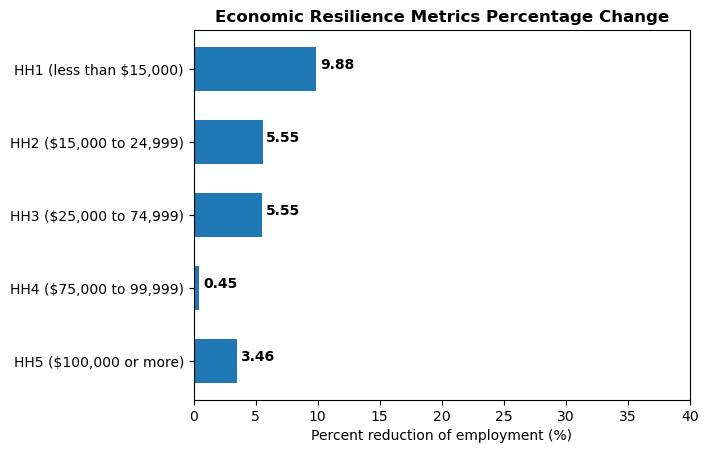

In [149]:
# emr = pd.read_csv('Joplin_testbed/Results/employment.csv')
plt.rcdefaults()
fig, ax = plt.subplots()

household = ('HH1 (less than $15,000)', 'HH2 ($15,000 to 24,999)', 'HH3 ($25,000 to 74,999)', \
           'HH4 ($75,000 to 99,999)', 'HH5 ($100,000 or more)')
y_pos = np.arange(len(household))
# performance = emr['percentage']
performance = (1 - emr['HWl']/emr['HW0']) * 100  # percentage

for i, v in enumerate(round(performance,2)):
    ax.text(v+0.3, i, str(v), color='black', fontweight='bold')
    
ax.barh(y_pos, performance, align='center', height=0.6)
ax.set_yticks(y_pos)
ax.set_yticklabels(household)
ax.invert_yaxis()
ax.set_xlabel('Percent reduction of employment (%)')
ax.set_title('Economic Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 40)
plt.show()

In [150]:
hir = household_income_result.get_dataframe_from_csv()
hir.head(8)

Y0          Yl        ΔY
0   29.219263   28.246418 -0.972845
1   34.897393   33.604096 -1.293297
2  125.029019  121.820471 -3.208547
3   65.009857   62.875881 -2.133975
4  205.147841  197.560549 -7.587293

[0 1 2 3 4]
0    3.329463
1    3.705998
2    2.566242
3    3.282541
4    3.698451
dtype: float64


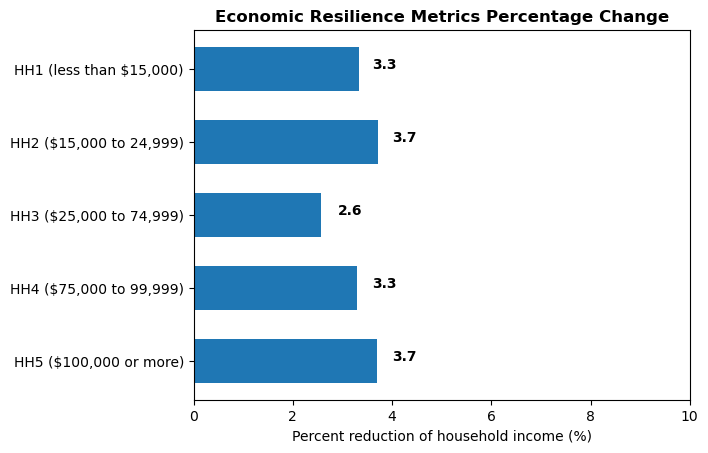

In [151]:
# hir = pd.read_csv('Joplin_testbed/Results/household-income.csv')
# hack to make it work with five households
hir = hir.iloc[0:5,:]

plt.rcdefaults()
fig, ax = plt.subplots()

household = ('HH1 (less than $15,000)', 'HH2 ($15,000 to 24,999)', 'HH3 ($25,000 to 74,999)', \
           'HH4 ($75,000 to 99,999)', 'HH5 ($100,000 or more)')
y_pos = np.arange(len(household))
# performance = hir['percentage']
performance = (1 - hir['Yl']/hir['Y0']) * 100  # percentage

for i, v in enumerate(round(performance,1)):
    ax.text(v+0.3, i, str(v), color='black', fontweight='bold')

print(y_pos)
print(performance)
ax.barh(y_pos, performance, align='center', height=0.6)
ax.set_yticks(y_pos)
ax.set_yticklabels(household)
ax.invert_yaxis()
ax.set_xlabel('Percent reduction of household income (%)')
ax.set_title('Economic Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 10)
plt.show()